In [81]:
import numpy as np
import matplotlib.pyplot as plt

kappa = 0.01

delta_t = 0.1
t_max = 10

delta_x = 0.01
x_max = 1

T = np.zeros(int(x_max/delta_x)*int(t_max/delta_t)).reshape(int(x_max/delta_x), int(t_max/delta_t))

for i in range(0, int(x_max/delta_x)):
    T[i, 0] = np.cos(2 * np.pi * i*delta_x)

I = np.eye(int(x_max/delta_x))
def generate_K_matrix(n):
    '''
    Write a function to generate a K matrix of size n x n.

    ## Parameters:
    - n (int): The size of the matrix.

    ## Returns:
    - K (numpy.ndarray): A n x n matrix.
    '''
    K = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            if i == j:
                K[i,j] = -2
            elif i == j+1 or i == j-1:
                K[i,j] = 1
    return K
K = generate_K_matrix(int(x_max/delta_x))

K[0, -1] = 1
K[-1, 0] = 1

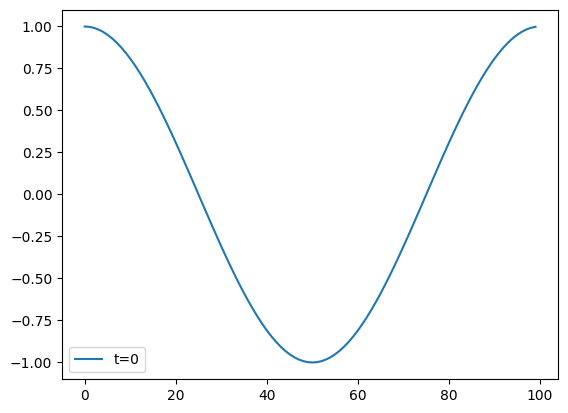

In [82]:
plt.plot(T[:, 0], label='t=0')
plt.legend()
plt.show()

In [83]:
Ratio = I - kappa * delta_t / (delta_x**2) * K

Ratio_inv = np.linalg.inv(Ratio)

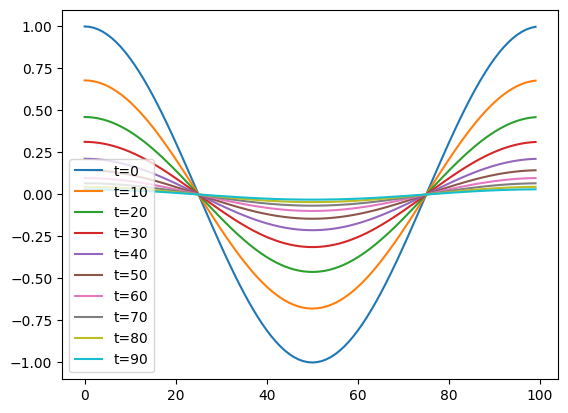

In [84]:
for i in range(0, int(t_max/delta_t)-1):
    T[:, i+1] = Ratio_inv @ T[:, i]
    if i % 10 == 0:
        plt.plot(T[:, i], label=f't={i}')
        plt.legend()
    
plt.show()


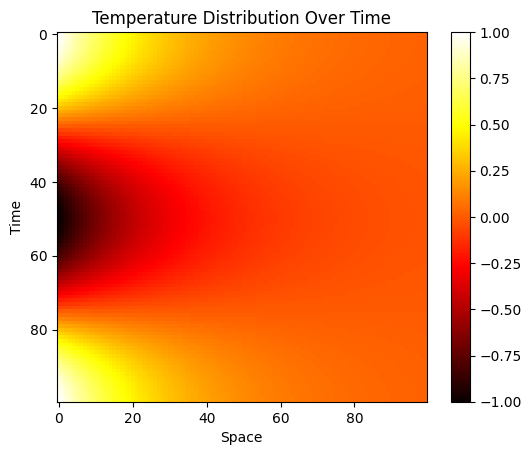

In [85]:
plt.imshow(T, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.title('Temperature Distribution Over Time')
plt.xlabel('Space')
plt.ylabel('Time')
plt.savefig('heat_equation.png', dpi=400)
plt.show()
